<a href="https://colab.research.google.com/github/AisikaRoy/GoodDayBiscuitClassification/blob/master/Goodday_incpv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [85]:
import tensorflow as tf
import numpy as np
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sn

In [2]:
def bright(img,c):
  mod=tf.keras.preprocessing.image.random_brightness(img, (0.55,0.65))
  cv2.imwrite("/content/drive/My Drive/iotresonance/data2/good2"+"/"+i+str(c)+"_1.jpg", mod)

def rotate(img,c):
  mod=tf.keras.preprocessing.image.random_rotation(img, 0.2)
  cv2.imwrite("/content/drive/My Drive/iotresonance/data2/good2"+"/"+i+str(c)+"_2.jpg", mod)

def shear(img,c):
  mod=tf.keras.preprocessing.image.random_shear(img, 0.15)
  cv2.imwrite("/content/drive/My Drive/iotresonance/data2/good2"+"/"+i+str(c)+"_3.jpg", mod)

def shift(img,c):
  mod=tf.keras.preprocessing.image.random_shift(img, 0.25, 0.25)
  cv2.imwrite("/content/drive/My Drive/iotresonance/data2/good2"+"/"+i+str(c)+"_4.jpg", mod)

In [ ]:
path_good=r"/content/drive/My Drive/iotresonance/data/good"
c=0
while ((len(os.listdir("/content/drive/My Drive/iotresonance/data2/good2")))<56):
  for i in os.listdir(path_good):
      img=cv2.imread(path_good+'/'+i)
      augmentation=[bright,rotate,shear,shift]
      random.choice(augmentation)(img,c)
      c+=1

In [13]:
for i in os.listdir(path_good):
      img=cv2.imread(path_good+'/'+i)
      cv2.imwrite("/content/drive/My Drive/iotresonance/data2/good2"+"/"+i+".jpg", img)

In [5]:
print('Good: ',len(os.listdir("/content/drive/My Drive/iotresonance/data2/good2")))
print('Bad: ',len(os.listdir("/content/drive/My Drive/iotresonance/data2/bad")))

Good:  76
Bad:  76


In [6]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=float(1/255),rotation_range=0.5, 
                                                        brightness_range=(0.45,0.65), shear_range=0.2,
                                                        horizontal_flip=True,vertical_flip=True, validation_split=0.30)
print("Training data: ")
training=datagen.flow_from_directory(
        r"/content/drive/My Drive/iotresonance/data2", 
        target_size=(300, 300),  batch_size=20, class_mode='binary', subset="training")

print("Validation data: ")
validation=datagen.flow_from_directory(
        r"/content/drive/My Drive/iotresonance/data2", 
        target_size=(300, 300),  batch_size=20, class_mode='binary', subset="validation")

Training data: 
Found 108 images belonging to 2 classes.
Validation data: 
Found 44 images belonging to 2 classes.


In [17]:
#

In [18]:
#

In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

inceptionv3 = InceptionV3(input_shape = (300, 300, 3), include_top = False, weights = None)
inceptionv3.load_weights(local_weights_file)
for i in inceptionv3.layers:
  i.trainable = False

inceptionv3.summary()


--2020-08-22 07:08:21--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 172.253.117.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   288MB/s    in 0.3s    

2020-08-22 07:08:21 (288 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                  

In [17]:
last_lyr_inceptionv3 = inceptionv3.get_layer('mixed7')
last_op = last_lyr_inceptionv3.output
from tensorflow.keras.optimizers import RMSprop
lyr = tf.keras.layers.Flatten()(last_op)
lyr = tf.keras.layers.Dense(1024, activation='relu')(lyr)
lyr = tf.keras.layers.Dense(1024, activation='relu')(lyr)
lyr = tf.keras.layers.Dense(512, activation='relu')(lyr)
lyr = tf.keras.layers.Dropout(0.25)(lyr)                  
lyr = tf.keras.layers.Dense  (1, activation='sigmoid')(lyr)           

incpv3_3 = tf.keras.Model( inceptionv3.input, lyr) 

incpv3_3.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [18]:
history3 = incpv3_3.fit(
            training,
            validation_data = validation,
            steps_per_epoch = 6,
            epochs = 40,
            validation_steps = 3,
            verbose = 1)

Epoch 1/40
6/6 [==============================] - 29s 5s/step - loss: 4.3780 - accuracy: 0.5556 - val_loss: 1.8062 - val_accuracy: 0.5000
Epoch 2/40
6/6 [==============================] - 26s 4s/step - loss: 1.6023 - accuracy: 0.6389 - val_loss: 0.5604 - val_accuracy: 0.7727
Epoch 3/40
6/6 [==============================] - 26s 4s/step - loss: 0.8375 - accuracy: 0.7593 - val_loss: 0.4526 - val_accuracy: 0.7955
Epoch 4/40
6/6 [==============================] - 27s 5s/step - loss: 0.6327 - accuracy: 0.7222 - val_loss: 0.4095 - val_accuracy: 0.7955
Epoch 5/40
6/6 [==============================] - 25s 4s/step - loss: 0.0365 - accuracy: 0.9815 - val_loss: 0.6892 - val_accuracy: 0.7045
Epoch 6/40
6/6 [==============================] - 24s 4s/step - loss: 0.0370 - accuracy: 0.9815 - val_loss: 0.5298 - val_accuracy: 0.7727
Epoch 7/40
6/6 [==============================] - 24s 4s/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.3230 - val_accuracy: 0.8182
Epoch 8/40
6/6 [==================

<Figure size 432x288 with 0 Axes>

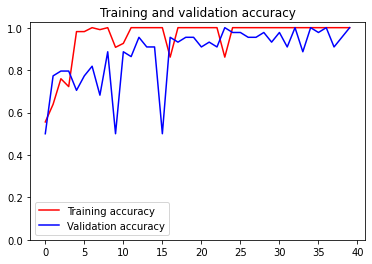

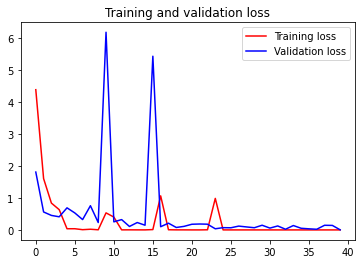

<Figure size 432x288 with 0 Axes>

In [19]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.ylim(0,None)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [57]:
filepath="/content/drive/My Drive/iotresonance/incpv3_31model.h5"
tf.keras.models.save_model(
    incpv3_3, filepath, overwrite=False, include_optimizer=True, save_format='h5',
    signatures=None, options=None
)

In [94]:
datas = []     
labels = []   
i = 0
for data, label in validation:
    datas.append(data)
    labels.append(label)
    i += 1
    if i == 5:
        break

y_test=[]
for i in labels:
  for j in i:
    y_test.append(j)

x_test=[]
for i in datas:
  for j in i:
    x_test.append(j)


(68, 300, 300, 3)


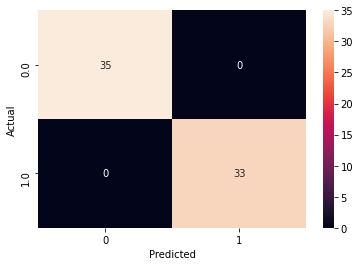

In [120]:
print(np.array(x_test).shape)
y_pred=incpv3_3.predict(np.array(x_test))
pred=[]
for i in y_pred:
  pred.append(int(i[0]>0.5))


act_pred = {'y_Actual':    y_test,
        'y_Predicted': pred
        }
dataframe = pd.DataFrame(act_pred, columns=['y_Actual','y_Predicted'])
ConfusionMatrix = pd.crosstab(dataframe['y_Actual'], dataframe['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(ConfusionMatrix, annot=True)

plt.show()

In [96]:
correct=0
wrong=0
for i in range(len(pred)):
  if(pred[i]==y_test[i]):
    correct+=1
  else:
    wrong+=1
print("Correct: ",correct, "Wrong: ",wrong)

Correct:  68 Wrong:  0


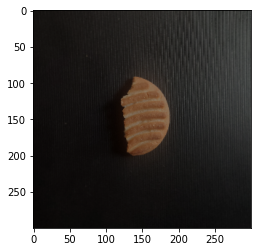

Actual label:  0.0 Predicted label:  0


In [100]:
k=10
imgplot = plt.imshow(x_test[k])
plt.show()
print('Actual label: ',y_test[k],'Predicted label: ',pred[k])

In [119]:
from PIL import Image
testing=Image.open('/content/drive/My Drive/iotresonance/bad gd2.jpg')
resized_testing = testing.resize((300,300))
testing_np=np.array(resized_testing)
testing_np=testing_np/255.0
print(testing_np.shape)
test=testing_np.reshape((1,300,300,3))
print(incpv3_3.predict(test))

(300, 300, 3)
[[0.04186041]]
